# SubTask1 Unsupervised Learning

In [1]:
# importing necessary libraries
import numpy as np      
import pandas as pd                                                # used for data manipulation and analysis
import matplotlib.pyplot as plt                                   # used for data visualization
from sklearn.cluster import KMeans                                #used for kmeans clustering/ method used for partitioning observations into clusters
from sklearn.metrics import silhouette_score, silhouette_samples    #used for evaluating clustering performance
import matplotlib.cm as cm                                           #used for colormap utilities


In [2]:
df = pd.read_csv('cluster2.csv', header = None).values #import the data and convert it into numpy array(KMeans typically expects NumPy arrays as input)
print('shape of df is :{}'.format(df.shape))            # get the shape of dataset



shape of df is :(1000, 2)


- Based on the scatter plot that is shown below, the data points appear to form clusters with varying densities. However, it is challenging to visually determine the exact number of clusters present in the data

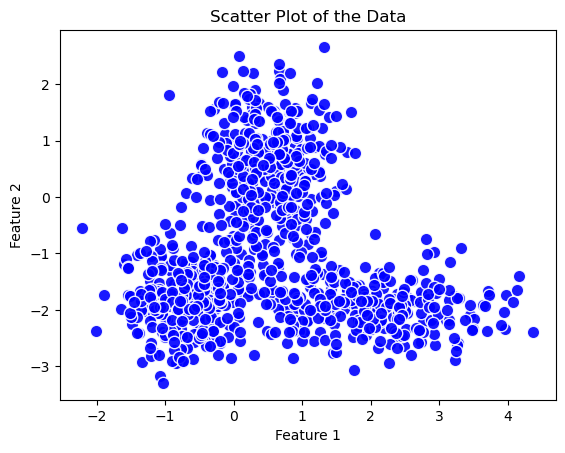

In [3]:
# plot dataset before custering to get insight from the dataset
def plot_unclustered_data(data):
    plt.scatter(df[:, 0], df[:, 1], alpha = 0.9, edgecolor = 'white', s = 80, color = 'blue')
    plt.title('Scatter Plot of the Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
plot_unclustered_data(df)

- we aim to use elbow method. The elbow method is a heuristic technique used to determine the optimal number of clusters in a dataset for clustering algorithms like K-means.
-  for determining the optimal number of clusters, and as we can see from the plot, the "elbow point" in the plot represents the point where adding more clusters does not significantly decrease the WCSS (within cluster sum of square) which is a metric to evaluate the quality of the clusters formed. **WCSS** represents the sum of squared distances between each data point and its nearest centroid within a cluster.
- by plotting the inertia values against the number of clusters we can determine determine the optimal number of clusters for the data.


## Elbow Method for determinig Optimal number of Clusters

C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

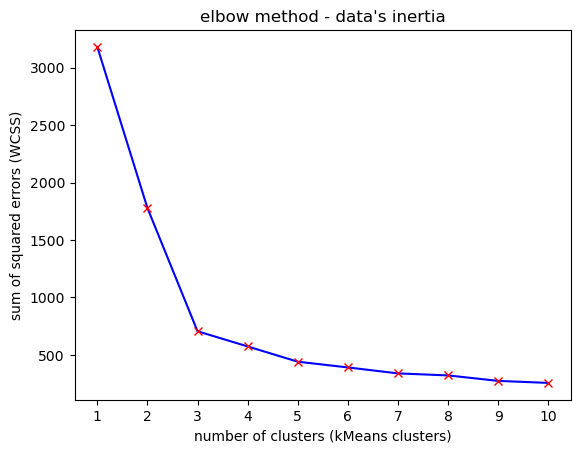

In [99]:
# Determine the optimal number of clusters using Elbow Method 

def elbow_method(data, title  ):
    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i)  # initialise kmeans
        kmeans.fit(data)                 # fit kmeans on our data
        inertia.append(kmeans.inertia_)   # store inertia of datapoints in a list to use it later for ploting
    plt.plot(range(1, 11), inertia, '-b', marker='x', color='blue', markerfacecolor='r', markeredgecolor='r')
    plt.title(title)
    plt.xlabel('Number of Clusters (kMeans Clusters)')
    plt.ylabel('Sum of Squared Errors (WCSS)')
    plt.xticks(np.arange(1, 11))
    plt.show()

elbow_method(df, "elbow method - data's inertia")
        
    

- As we can see in the graph, from k = 3 (elbow point), adding more clusters does not significantly decrease the WCSS (within cluster sum of square).
  which means the optimal number of clusters is 3.

- Next step is draw scatter plot based on the optimal number of clusters obtained from elbow method which is k = 3.

## Scatter plot for three cluster

C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


(1000,)


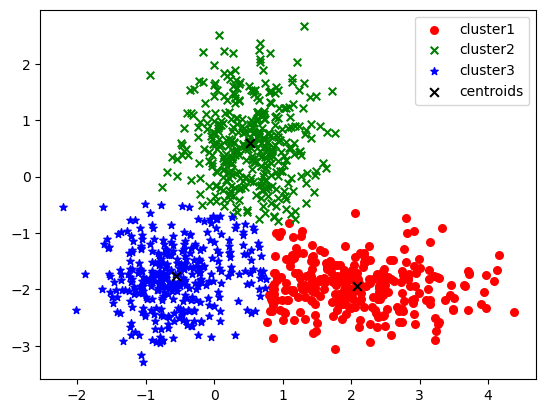

In [125]:
# using the inertia calculated from the elbow method, plot the optimum number of clusters for this dataset
def plot_optimal_cluster(data, pred, num_clusters):
    markers = ['o', 'x','*']
    colors = ['red', 'green', 'blue']  # Define colors for each cluster
    
    for i in range(0, num_clusters):
        cluster_labels = 'cluster' + str(i + 1)
        
        plt.scatter(data[pred == i, 0], data[pred == i, 1], marker = markers[i], s = 30, label = cluster_labels, c = colors[i]) #scatter plot based on labels
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'x', color = 'black', s = 40, label = 'centroids')  # scatter plot of cluster centers
    plt.legend()
    plt.show()
        
        
kmeans = KMeans(n_clusters = 3, random_state = 0)      #initialize kmeans with 3 clusters based on elbow method
cluster_labels = kmeans.fit_predict(df)                 # fit kmeans clustering on the data to predict labels corresponding to each datapoints
print(cluster_labels.shape)
plot_optimal_cluster(df, cluster_labels, 3)




## Calculating Silhouette Scores 

- The silhouette score is a measure of how similar an object is to its own cluster compared to other
clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched 
to neighboring clusters. The silhouette score is used to evaluate the quality of clustering algorithms.
- A higher silhouette score suggests better-defined clusters.

Running Silhouette Analysis on Data...
For n_clusters = 2 The average silhouette_score is : 0.42275284608341906


C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


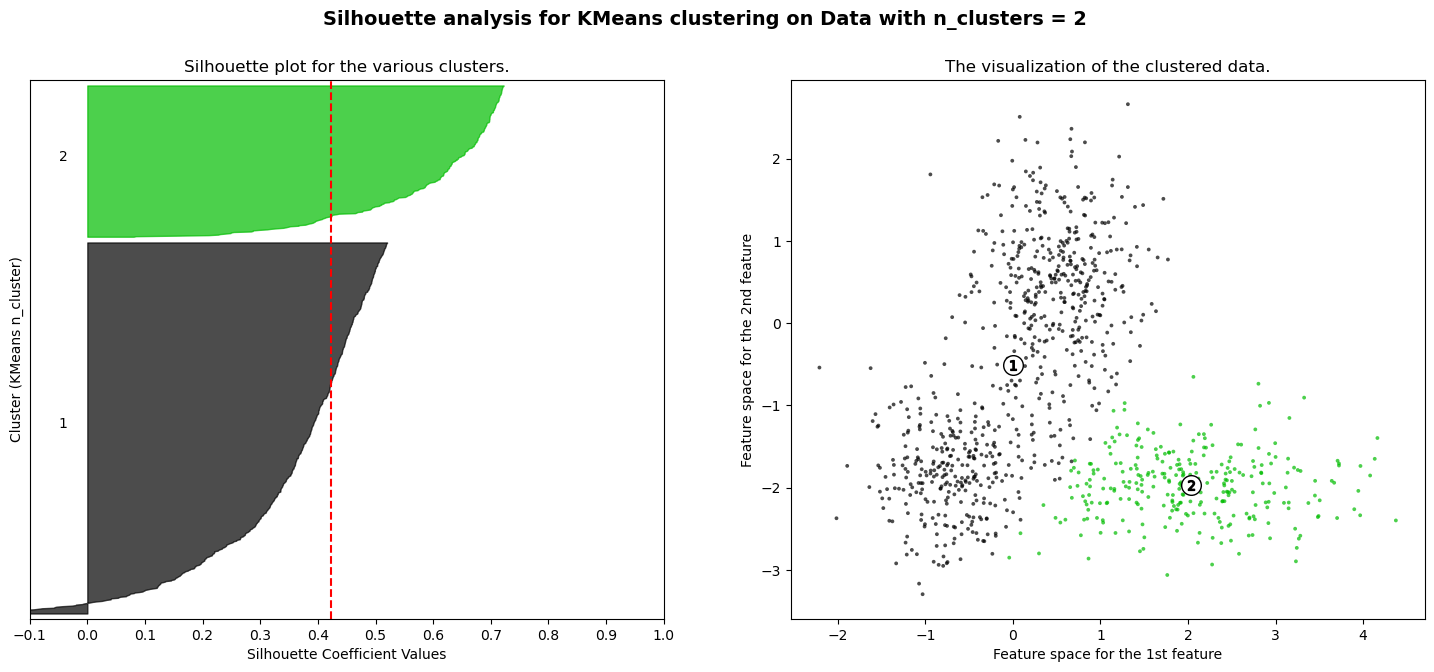

C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5738307485410833


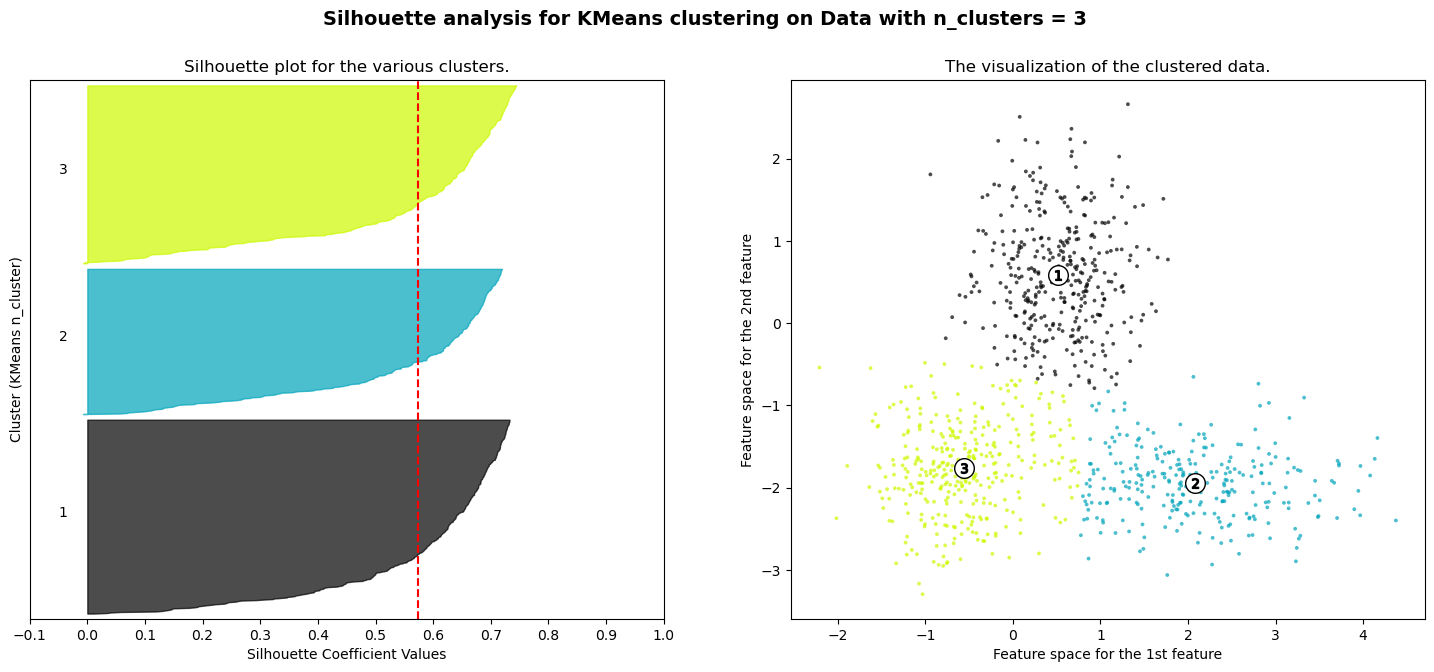

C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4855380031938388


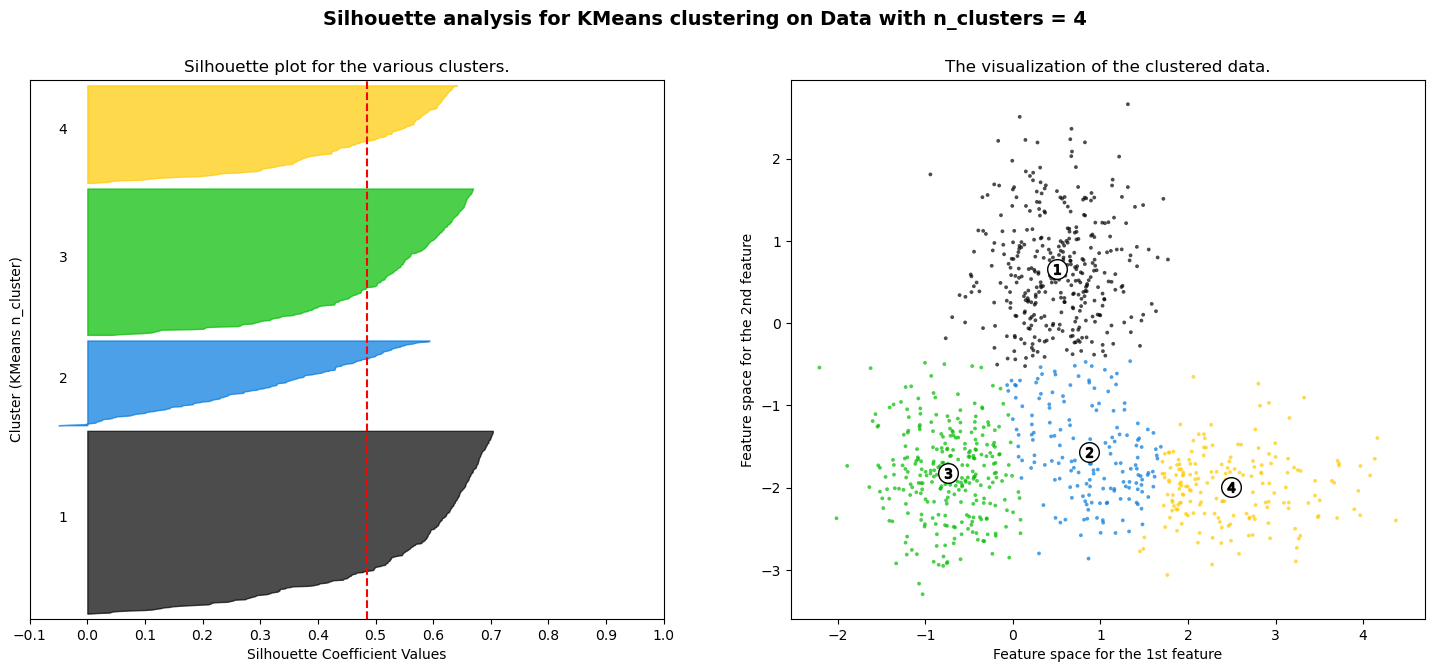

C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.41729939338986594


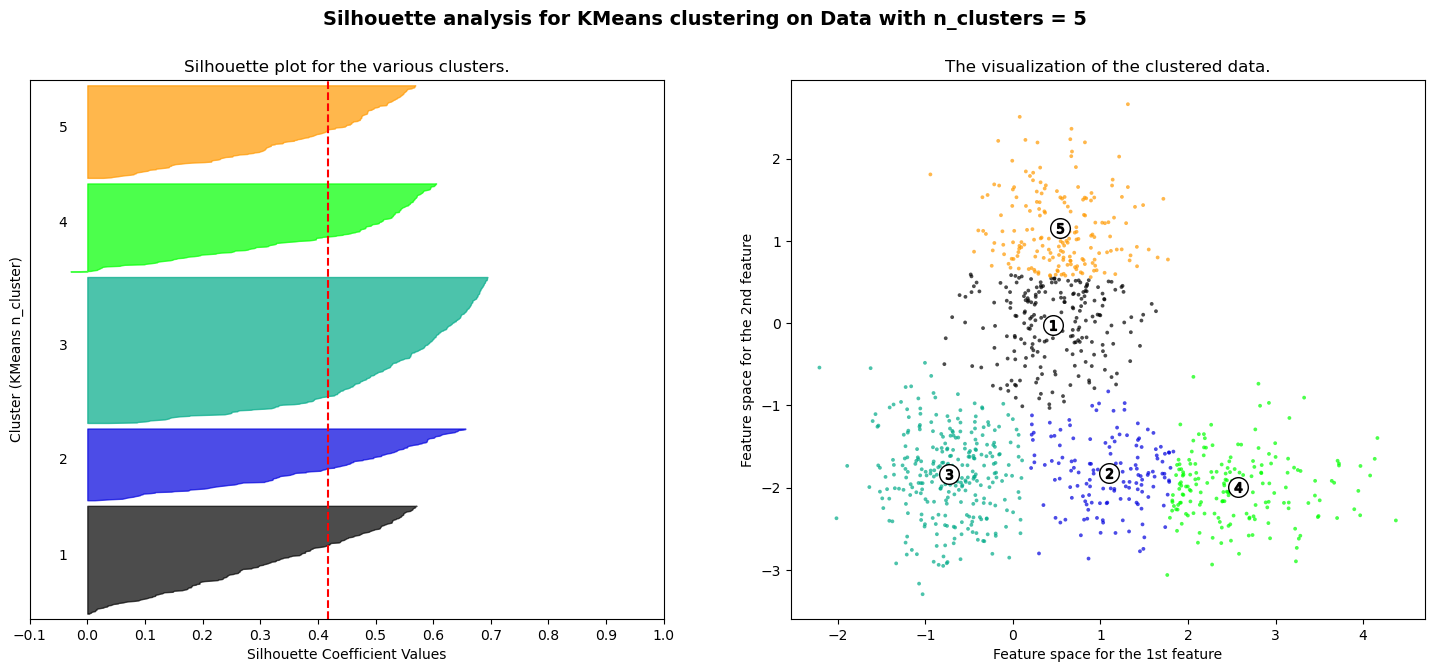

C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.38999396220371646


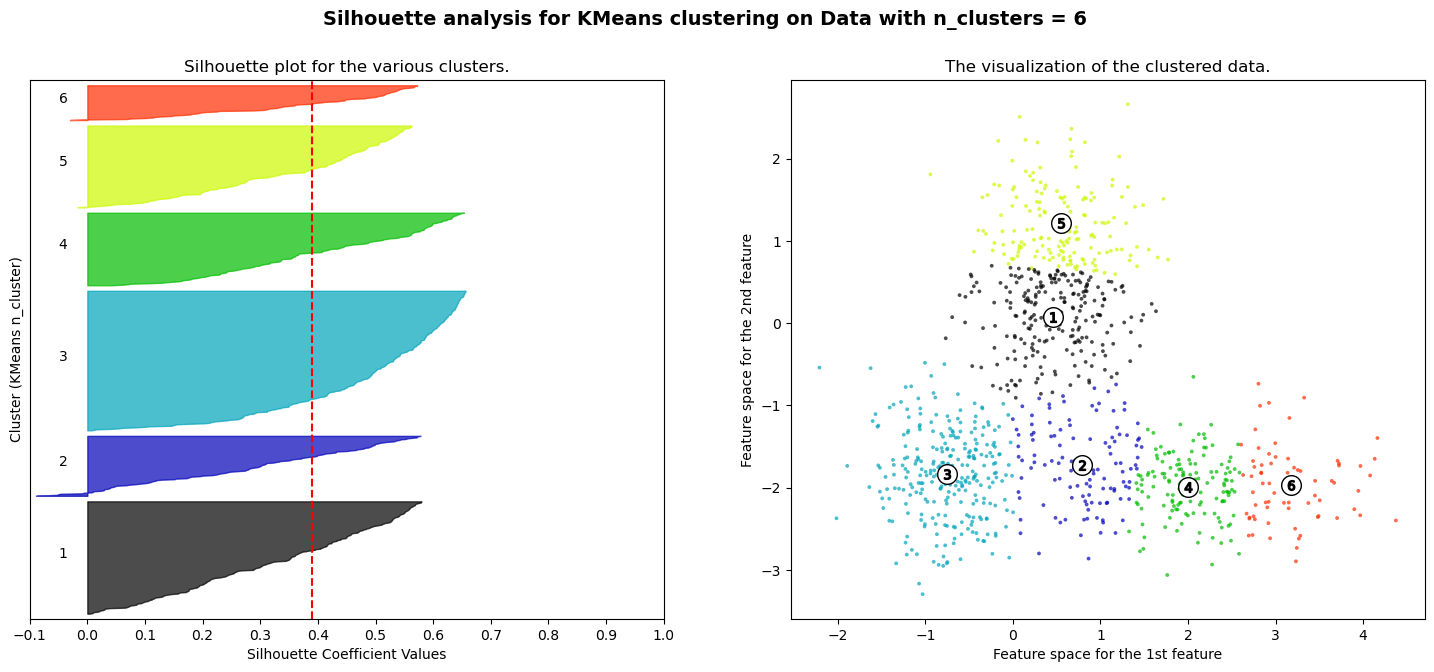

In [126]:
# Silhouette Algorithm to measures how similar are the data points within the cluster compared to other clusters
def silhouette(X, range_n_clusters, title):
    
    print("Running Silhouette Analysis on " + title + "...")
    for n_clusters in range_n_clusters:
        
        
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
            # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Silhouette plot for the various clusters.")
        ax1.set_xlabel("Silhouette Coefficient Values")
        ax1.set_ylabel("Cluster (KMeans n_cluster)")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
        
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1,
                            s=50, edgecolor='k')
        
            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")
        
        plt.suptitle(("Silhouette analysis for KMeans clustering on " + title +
                  " with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
        plt.show()

range_n_clusters = [2, 3, 4, 5, 6]
silhouette(df, range_n_clusters, "Data")

    

## Silhouette Analysis

- In the silhouette analysis conducted for different numbers of clusters **(2, 4, 5, and 6)**, it was observed that some clusters produced **negative 
silhouette scores**, indicating that some data points were poorly matched to their assigned clusters. However, when the number of clusters was set to **3**,
all silhouette scores were **positive**, indicating that each data point was well matched to its cluster and there were no instances of poor cluster
assignment.

## Plot Silhouette Scores

C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

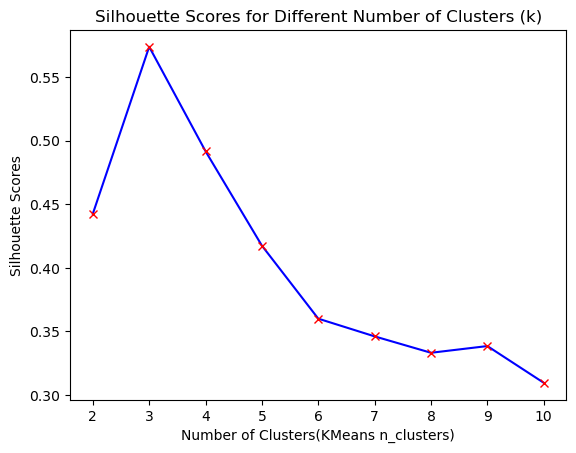

In [136]:
# plot for silhouette score for different number of clusters
def plot_silhoutte_score(data, title):
    scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters = i, random_state = 0)
        kmeans.fit_predict(data)
        cluster_labels = kmeans.labels_
        score = silhouette_score(data, cluster_labels)
        scores.append(score)
    plt.plot(np.arange(2, 11), scores, '-b', marker='x', color='blue', markerfacecolor='r', markeredgecolor='r')
    plt.xlabel('Number of Clusters(KMeans n_clusters)')
    plt.ylabel('Silhouette Scores')
    plt.title(title)
plot_silhoutte_score(df, 'Silhouette Scores for Different Number of Clusters (k)')
        

- Higher silhouette scores indicate well-separated clusters, thus, higher silhouette score suggests better-defined clusters. and justifies choosing **k=3** as an optimal numebr of clusters.